### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# xgboost
import xgboost as xgb
import lightgbm as lgb

In [2]:
# oversampling techniques to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.under_sampling import RandomUnderSampler as RUS
from collections import Counter

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

### 1. Load the dataset

In [4]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [5]:
_train = train.copy()

In [6]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [7]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



In [9]:
 #show some information about the dataset
 print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [10]:
# use all columns except the target as features
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [11]:
# Convert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

In [12]:
# preview the label classes
le.classes_

array(['No', 'Yes'], dtype=object)

In [13]:
features = train.drop('bank_account', axis=1)
labels = train['bank_account']

In [14]:
features.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   location_type           23524 non-null  object
 4   cellphone_access        23524 non-null  object
 5   household_size          23524 non-null  int64 
 6   age_of_respondent       23524 non-null  int64 
 7   gender_of_respondent    23524 non-null  object
 8   relationship_with_head  23524 non-null  object
 9   marital_status          23524 non-null  object
 10  education_level         23524 non-null  object
 11  job_type                23524 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.2+ MB


In [16]:
features['marital_status'].value_counts()

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

In [17]:
features['education_level'].value_counts()

education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64

In [18]:
features['relationship_with_head'].value_counts()

relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64

In [19]:
features['job_type'].value_counts()

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

In [20]:
features['location_type'].value_counts()

location_type
Rural    14343
Urban     9181
Name: count, dtype: int64

In [21]:
_features = features.copy()

In [22]:
_features = _features.drop(['uniqueid'], axis=1)

In [23]:
features_to_scale = ['household_size', 'age_of_respondent', 'year']

scaler = MinMaxScaler()
_features[features_to_scale] = scaler.fit_transform(features[features_to_scale])

In [24]:
# save labelEncoder and scaler
import pickle
with open('labelEncoder.pkl', 'wb') as f:
    pickle.dump(le, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [25]:
categorical_columns = _features.select_dtypes(include=['object']).columns
categorical_columns

Index(['country', 'location_type', 'cellphone_access', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [26]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first', dtype=int)

In [27]:
# Fit and transform the training data
_features_encoded = pd.DataFrame(\
    encoder.fit_transform(_features[categorical_columns]),\
    columns=encoder.get_feature_names_out(categorical_columns))

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
_features_encoded.head()

,country_Rwanda,country_Tanzania,country_Uganda,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
# Combine encoded features with non-categorical features
_features_processed = pd.concat([_features.drop(columns=categorical_columns), _features_encoded], axis=1)


In [30]:
_features_processed.head()
_features = _features_processed

In [31]:
# save the encoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [32]:
# under sample the majority class
# rus = RUS(random_state=42)
# _features, labels = rus.fit_resample(_features, labels)


In [33]:
# overs ample the minority class
# ros = ROS(random_state=42, sampling_strategy='minority')
# _features_over, labels_over = ros.fit_resample(_features, labels)

In [34]:
# _features = _features_over
# labels = labels_over

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


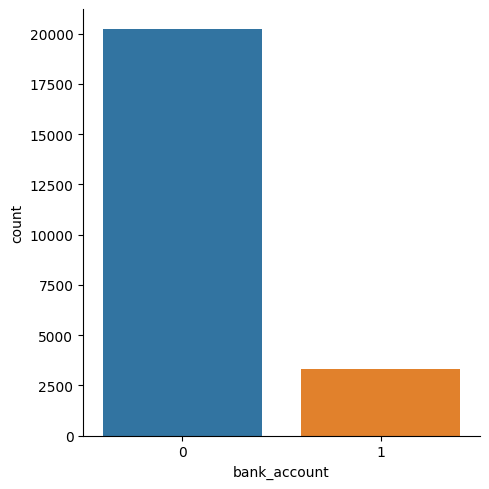

In [35]:
# join _features and labels into a single dataframe
_train_ = pd.concat([_features, labels], axis=1)
sns.catplot(x="bank_account", kind="count", data=_train_)

In [36]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(_features, labels, test_size=0.2, random_state=42, stratify=labels)

In [37]:
# check the shapes of the train and test sets
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)

X_train shape : (18819, 32)
X_test shape : (4705, 32)


In [38]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Logistic Regression classification report:\n', classification_report(y_test, y_pred))

Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      4043
           1       0.70      0.35      0.47       662

    accuracy                           0.89      4705
   macro avg       0.80      0.67      0.70      4705
weighted avg       0.87      0.89      0.87      4705



Decision Tree classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      4414
           1       0.68      0.78      0.72       291

    accuracy                           0.96      4705
   macro avg       0.83      0.88      0.85      4705
weighted avg       0.97      0.96      0.96      4705



<Axes: >

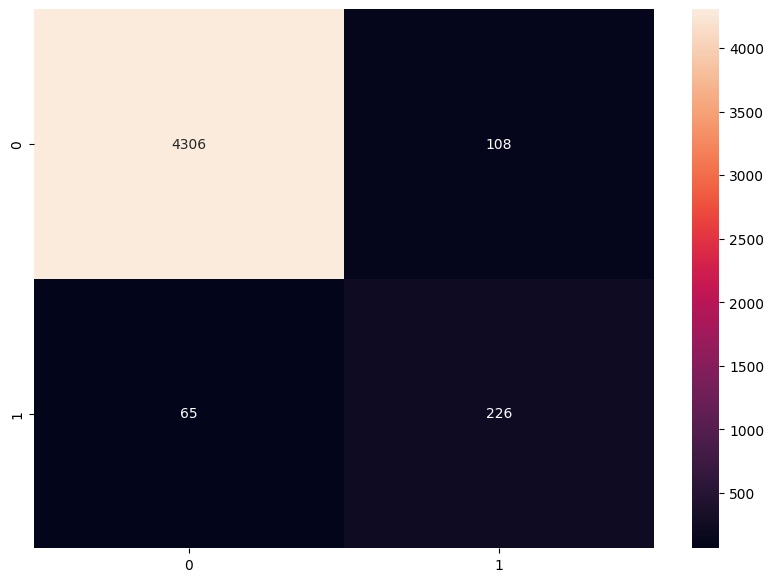

In [68]:
# Decision Tree
dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=0.01,
    min_samples_leaf=0.01,
    random_state=42,
    criterion='entropy'
)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
print('Decision Tree classification report:\n', classification_report(dt_y_pred, y_pred))

# confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(dt_y_pred, y_pred), annot=True, fmt='d')

Random Forest classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      4187
           1       0.71      0.46      0.55       518

    accuracy                           0.92      4705
   macro avg       0.82      0.72      0.75      4705
weighted avg       0.91      0.92      0.91      4705



<Axes: >

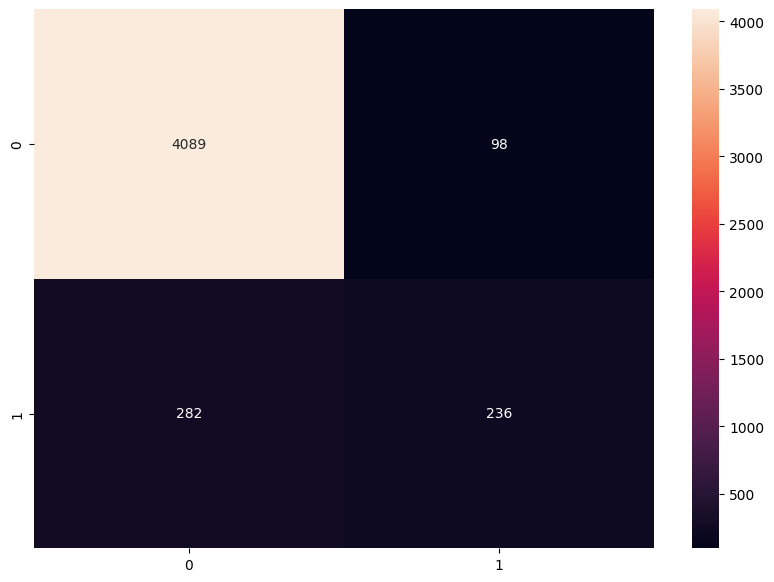

In [62]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
print('Random Forest classification report:\n', classification_report(rf_y_pred, y_pred))

# confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(rf_y_pred, y_pred), annot=True, fmt='d')

In [41]:
# XGBoost
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)
print('XGBoost classification report:\n', classification_report(xgb_y_pred, y_pred))

XGBoost classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      4309
           1       0.76      0.64      0.70       396

    accuracy                           0.95      4705
   macro avg       0.86      0.81      0.84      4705
weighted avg       0.95      0.95      0.95      4705



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2650, number of negative: 16169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 18819, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140815 -> initscore=-1.808536
[LightGBM] [Info] Start training from score -1.808536
LightGBM classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4346
           1       0.78      0.72      0.75       359

    accuracy                           0.96      4705
   macro avg       0.88      0.85      0.87      4705
weighted avg       0.96      0.96      0.96      4705



<Axes: >

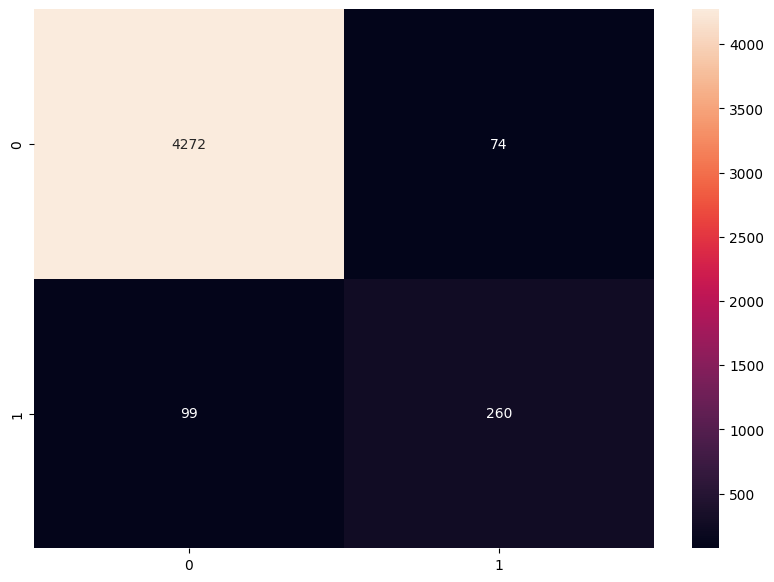

In [54]:
# LightGBM
lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(X_train, y_train)
lgb_y_pred = lgb_clf.predict(X_test)
print('LightGBM classification report:\n', classification_report(lgb_y_pred, y_pred))

# confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(lgb_y_pred, y_pred), annot=True, fmt='d')

In [44]:
def load_processors():
    with open('encoder.pkl', 'rb') as f:
        encoder = pickle.load(f)

    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)

    return encoder, scaler

def process_new_data(new_data):
    encoder, scaler = load_processors()
    try:
        new_data = new_data.drop(['uniqueid'], axis=1)
    except:
        pass

    features_to_scale = ['household_size', 'age_of_respondent', 'year']
    categorical_columns = ['country', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']

    # Transform the new data using the saved encoder
    new_data_encoded = pd.DataFrame(encoder.transform(new_data[categorical_columns]),
                                    columns=encoder.get_feature_names_out(categorical_columns))

    # Combine encoded features with non-categorical features
    new_data_processed = pd.concat([new_data.drop(columns=categorical_columns), new_data_encoded], axis=1)

    return new_data_processed

In [45]:
_dt = train.head(1).drop(['uniqueid', 'bank_account'], axis=1)
print(_dt.shape)
_dt

(1, 11)


,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed


In [46]:
__dt_processed = process_new_data(_dt)
__dt_processed

,year,household_size,age_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3,24,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
prediction = lgb_clf.predict(__dt_processed.values)
prediction

array([1])

In [48]:
test.bank_account = lgb_clf.predict(process_new_data(test))

C:\Users\Edgar\AppData\Local\Temp\ipykernel_2872\2060291392.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.bank_account = lgb_clf.predict(process_new_data(test))


In [49]:
# Create submission DataFrame
submission = pd.DataFrame(
    {
        "uniqueid": test["uniqueid"] + " x " + test["country"],
        "bank_account": test.bank_account
    }
)
# Create submission csv file csv file
submission.to_csv('sampled_submission.csv', index = False)